# 1. 모듈, 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import time
import numpy as np
import re

In [2]:
BillDf = pd.read_csv("./21대 국회 의안정보 new.csv", encoding='utf-8-sig') #200824업데이트
BillDf.head()

,의안번호,처리여부,의안명,제안자구분,제안일자,의결일자,의결결과,심사진행상태,문서,제안회기,제안이유,소관위원회,제안자
0,2103236,계,유통산업발전법 일부개정법률안(박재호의원 등 10인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,['제안이유 및 주요내용현행법은 대ㆍ중소유통업의 상생발전과 지역상권의 활성화를 도모...,[],"['박재호(더불어민주당/朴在昊)', '김경협(더불어민주당/金炅俠)', '김정호(더불..."
1,2103235,계,도로교통법 일부개정법률안(황운하의원 등 13인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,['제안이유 및 주요내용현행법은 자동차등이 정지하고 있는 경우 등을 제외하고는 운전...,[],"['황운하(더불어민주당/黃雲夏)', '김경만(더불어민주당/金京萬)', '김경협(더불..."
2,2103234,계,철도산업발전기본법 일부개정법률안(이은주의원 등 30인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,"['제안이유 및 주요내용정부는 「노인복지법」,「장애인복지법」 등에 따라 65세 이상...",[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."
3,2103233,계,도시철도법 일부개정법률안(이은주의원 등 29인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,"['제안이유정부는 「노인복지법」,「장애인복지법」 등에 따라 65세 이상 노인·장애인...",[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."
4,2103232,계,대중교통의 육성 및 이용촉진에 관한 법률 일부개정법률안(이은주의원 등 29인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,"['제안이유최근 코로나19 바이러스의 확산에 따라 외출 자제 및 재택근무 권고, 학...",[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."


# 2. 전처리

#### ①  [의안번호] ZZ로 시작하는 행 삭제

In [3]:
indexlist=[]

for k in range(len(BillDf)):
    if 'ZZ' in str(BillDf['의안번호'][k]):
        indexlist.append(k)


indexlist
BillDf = BillDf.drop(indexlist)        

In [4]:
# 인덱스 리셋

BillDf.reset_index(drop=False, inplace=True)

#### ② [제안이유] 특수문자 및 '제안이유 및 주요내용', '제안이유', '주요내용' 문자열 삭제

In [5]:
def clean_reason(df_col): 
    text = df_col[2:-2].replace('제안이유 및 주요내용','').replace('대안의 제안이유 및 주요내용','').replace('대안의 주요내용','').replace('대안의 제안이유','').replace('제안이유','').replace('주요내용','')
    return re.sub('[-=.#/:$}·,■?]', ' ', text)

In [6]:
BillDf['제안이유'] = BillDf['제안이유'].apply(lambda x: clean_reason(x))

In [7]:
BillDf.head(10)

,index,의안번호,처리여부,의안명,제안자구분,제안일자,의결일자,의결결과,심사진행상태,문서,제안회기,제안이유,소관위원회,제안자
0,0,2103236,계,유통산업발전법 일부개정법률안(박재호의원 등 10인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법은 대ㆍ중소유통업의 상생발전과 지역상권의 활성화를 도모하기 위하여 대규모점포와...,[],"['박재호(더불어민주당/朴在昊)', '김경협(더불어민주당/金炅俠)', '김정호(더불..."
1,1,2103235,계,도로교통법 일부개정법률안(황운하의원 등 13인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법은 자동차등이 정지하고 있는 경우 등을 제외하고는 운전 중에 영상표시장치를 시...,[],"['황운하(더불어민주당/黃雲夏)', '김경만(더불어민주당/金京萬)', '김경협(더불..."
2,2,2103234,계,철도산업발전기본법 일부개정법률안(이은주의원 등 30인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,정부는 「노인복지법」 「장애인복지법」 등에 따라 65세 이상 노인 장애인 등에 대하...,[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."
3,3,2103233,계,도시철도법 일부개정법률안(이은주의원 등 29인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,정부는 「노인복지법」 「장애인복지법」 등에 따라 65세 이상 노인 장애인 등에 대하...,[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."
4,4,2103232,계,대중교통의 육성 및 이용촉진에 관한 법률 일부개정법률안(이은주의원 등 29인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,최근 코로나19 바이러스의 확산에 따라 외출 자제 및 재택근무 권고 학교 개학 연...,[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."
5,5,2103231,계,국정감사 및 조사에 관한 법률 일부개정법률안(박재호의원 등 10인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법에 따르면 위원회 소위원회 또는 반은 감사 또는 조사를 위하여 필요한 자료를...,[],"['박재호(더불어민주당/朴在昊)', '김수흥(더불어민주당/金洙興)', '김정호(더불..."
6,6,2103230,계,도시재생 활성화 및 지원에 관한 특별법 일부개정법률안(박재호의원 등 10인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,지역의 도시재생 역량 제고를 위해 각 대학에서 도시재생 분야를 전공한 전문인력의 확...,[],"['박재호(더불어민주당/朴在昊)', '김경협(더불어민주당/金炅俠)', '김수흥(더불..."
7,7,2103229,계,공익사업을 위한 토지 등의 취득 및 보상에 관한 법률 일부개정법률안(박재호의원 ...,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,「해양산업클러스터의 지정 및 육성 등에 관한 특별법」은 해양산업클러스터 개발을 위하...,[],"['박재호(더불어민주당/朴在昊)', '김승남(더불어민주당/金承南)', '김윤덕(더불..."
8,8,2103228,계,자본시장과 금융투자업에 관한 법률 일부개정법률안(박용진의원 등 11인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,공매도는 주가하락 예상 시 차입한 주식으로 매도 후 결제하고 실제로 주가하락 시 ...,[],"['박용진(더불어민주당/朴用鎭)', '기동민(더불어민주당/奇東旻)', '김경만(더불..."
9,9,2103227,계,유료도로법 일부개정법률안(박재호의원 등 10인),의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법은 유료도로관리청 또는 유료도로관리권자는 해당 유료도로를 통행한 자가 통행료를...,[],"['박재호(더불어민주당/朴在昊)', '김경협(더불어민주당/金炅俠)', '김수흥(더불..."


#### ③ [의안명]뒤 대표제안자 포함 괄호 삭제

In [8]:
for i in range(len(BillDf)):
    BillDf['의안명'][i] = BillDf['의안명'][i].split('(')[0]

/Users/ojoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
BillDf.head(10)

,index,의안번호,처리여부,의안명,제안자구분,제안일자,의결일자,의결결과,심사진행상태,문서,제안회기,제안이유,소관위원회,제안자
0,0,2103236,계,유통산업발전법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법은 대ㆍ중소유통업의 상생발전과 지역상권의 활성화를 도모하기 위하여 대규모점포와...,[],"['박재호(더불어민주당/朴在昊)', '김경협(더불어민주당/金炅俠)', '김정호(더불..."
1,1,2103235,계,도로교통법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법은 자동차등이 정지하고 있는 경우 등을 제외하고는 운전 중에 영상표시장치를 시...,[],"['황운하(더불어민주당/黃雲夏)', '김경만(더불어민주당/金京萬)', '김경협(더불..."
2,2,2103234,계,철도산업발전기본법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,정부는 「노인복지법」 「장애인복지법」 등에 따라 65세 이상 노인 장애인 등에 대하...,[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."
3,3,2103233,계,도시철도법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,정부는 「노인복지법」 「장애인복지법」 등에 따라 65세 이상 노인 장애인 등에 대하...,[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."
4,4,2103232,계,대중교통의 육성 및 이용촉진에 관한 법률 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,최근 코로나19 바이러스의 확산에 따라 외출 자제 및 재택근무 권고 학교 개학 연...,[],"['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당/姜恩..."
5,5,2103231,계,국정감사 및 조사에 관한 법률 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법에 따르면 위원회 소위원회 또는 반은 감사 또는 조사를 위하여 필요한 자료를...,[],"['박재호(더불어민주당/朴在昊)', '김수흥(더불어민주당/金洙興)', '김정호(더불..."
6,6,2103230,계,도시재생 활성화 및 지원에 관한 특별법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,지역의 도시재생 역량 제고를 위해 각 대학에서 도시재생 분야를 전공한 전문인력의 확...,[],"['박재호(더불어민주당/朴在昊)', '김경협(더불어민주당/金炅俠)', '김수흥(더불..."
7,7,2103229,계,공익사업을 위한 토지 등의 취득 및 보상에 관한 법률 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,「해양산업클러스터의 지정 및 육성 등에 관한 특별법」은 해양산업클러스터 개발을 위하...,[],"['박재호(더불어민주당/朴在昊)', '김승남(더불어민주당/金承南)', '김윤덕(더불..."
8,8,2103228,계,자본시장과 금융투자업에 관한 법률 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,공매도는 주가하락 예상 시 차입한 주식으로 매도 후 결제하고 실제로 주가하락 시 ...,[],"['박용진(더불어민주당/朴用鎭)', '기동민(더불어민주당/奇東旻)', '김경만(더불..."
9,9,2103227,계,유료도로법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법은 유료도로관리청 또는 유료도로관리권자는 해당 유료도로를 통행한 자가 통행료를...,[],"['박재호(더불어민주당/朴在昊)', '김경협(더불어민주당/金炅俠)', '김수흥(더불..."


#### ④ [제안자구분] -> 의원, 의장, 위원장 데이터만 남기고 삭제

In [10]:
indexlist=[]

for k in range(len(BillDf)):
    if BillDf['제안자구분'][k]!='의원' and BillDf['제안자구분'][k]!='의장' and BillDf['제안자구분'][k]!='위원장':
        indexlist.append(k)



BillDf = BillDf.drop(indexlist)   

In [11]:
# 인덱스 리셋

BillDf.reset_index(drop=False, inplace=True)

- 문화체육관광위원회 -> 도종환(더불어민주당)
- 국토교통위원회 -> 진선미(더불어민주당)
- 보건복지위원회 -> 한정애(더불어민주당)
- 법제사법위원회 -> 윤호중(더불어민주당)
- 국회상임위원회 위원 정수에 관한 규칙 개정 특별 위원회 -> 김영진(더불어민주당) 


#### ⑤ [제안자] 칼럼 스플릿, 제안 정당만 따와서 리스트로 변환 (중복제거) -> [제안정당] 칼럼 생성

In [12]:
# [제안자]칼럼 콤마 기준 스플릿

BillDf['제안자'] = BillDf['제안자'].str.split(',')

In [13]:
BillDf['제안자'] = BillDf['제안자'].fillna("a") #object of type 'float' has no len() 오류 해결

list1 = []

for i in range(len(BillDf)):
    
    list2 = []
    
    if BillDf['제안자'][i] != "a":
        
        for j in range(len(BillDf['제안자'][i])):
            
            list2.append(BillDf['제안자'][i][j].split('(')[-1].split('/')[0])
            
        list1.append(list(set(list2)))
    
    else:
        list1.append(np.NaN)
        
BillDf['제안정당'] = list1  


In [14]:
BillDf

,level_0,index,의안번호,처리여부,의안명,제안자구분,제안일자,의결일자,의결결과,심사진행상태,문서,제안회기,제안이유,소관위원회,제안자,제안정당
0,0,0,2103236,계,유통산업발전법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법은 대ㆍ중소유통업의 상생발전과 지역상권의 활성화를 도모하기 위하여 대규모점포와...,[],"[['박재호(더불어민주당/朴在昊)', '김경협(더불어민주당/金炅俠)', '김정호...",[더불어민주당]
1,1,1,2103235,계,도로교통법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,현행법은 자동차등이 정지하고 있는 경우 등을 제외하고는 운전 중에 영상표시장치를 시...,[],"[['황운하(더불어민주당/黃雲夏)', '김경만(더불어민주당/金京萬)', '김경협...",[더불어민주당]
2,2,2,2103234,계,철도산업발전기본법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,정부는 「노인복지법」 「장애인복지법」 등에 따라 65세 이상 노인 장애인 등에 대하...,[],"[['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당...","[무소속, 정의당, 더불어민주당, 미래통합당, 열린민주당]"
3,3,3,2103233,계,도시철도법 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,정부는 「노인복지법」 「장애인복지법」 등에 따라 65세 이상 노인 장애인 등에 대하...,[],"[['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당...","[무소속, 정의당, 더불어민주당, 미래통합당, 열린민주당]"
4,4,4,2103232,계,대중교통의 육성 및 이용촉진에 관한 법률 일부개정법률안,의원,2020-08-24,NaN,NaN,접수,NaN,제21대 (2020~2024) 제381회,최근 코로나19 바이러스의 확산에 따라 외출 자제 및 재택근무 권고 학교 개학 연...,[],"[['이은주(정의당/李恩周)', '강민정(열린민주당/姜旼姃)', '강은미(정의당...","[무소속, 정의당, 더불어민주당, 미래통합당, 열린민주당]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,4227,4249,2100005,계,고등교육법 일부개정법률안,의원,2020-06-01,NaN,NaN,소관위접수,의안원문\r\n비용추계서 미첨부 사유서,제21대 (2020~2024) 제378회,전대미문의 코로나 19 감염병의 장기간 창궐로 대학들은 감염병 예방을 위해 온라인 ...,교육위원회,"[['이종배(미래통합당/李鍾培)', '강기윤(미래통합당/姜起潤)', '강대식(미...",[미래통합당]
3987,4228,4250,2100004,계,감염병의 예방 및 관리에 관한 법률 일부개정법률안,의원,2020-06-01,NaN,NaN,소관위심사,의안원문\r\n비용추계서 미첨부 사유서,제21대 (2020~2024) 제378회,현행법에 따르면 감염병 확산방지를 위한 격리시설의 설치 운영 감염병 환자를 진료한...,보건복지위원회,"[['이종배(미래통합당/李鍾培)', '강기윤(미래통합당/姜起潤)', '강대식(미...",[미래통합당]
3988,4229,4251,2100003,계,장애인활동 지원에 관한 법률 일부개정법률안,의원,2020-06-01,NaN,NaN,소관위심사,의안원문\r\n비용추계서 미첨부 사유서,제21대 (2020~2024) 제378회,현행법은 「노인장기요양보험법」에 따른 노인등을 활동지원급여 신청자격에서 제외하고 있...,보건복지위원회,"[['장제원(미래통합당/張濟元)', '권성동(무소속/權性東)', '김정재(미래통...","[무소속, 미래통합당]"
3989,4230,4252,2100002,계,정부조직법 일부개정법률안,의원,2020-06-01,NaN,NaN,소관위접수,의안원문\r\n비용추계서,제21대 (2020~2024) 제378회,코로나바이러스감염증 19(COVID 19) 대유행 이후 국가 감염병 대응 역량을 강...,행정안전위원회,"[['신현영(더불어민주당/申賢榮)', '고용진(더불어민주당/高榕禛)', '김경만...","[무소속, 더불어민주당]"


#### ⑥ 제안자구분이 '위원장'인 경우 제안정당->더불어민주당으로 채우기

In [15]:
BillDf[BillDf['제안자구분']=='위원장'].head(20)

,level_0,index,의안번호,처리여부,의안명,제안자구분,제안일자,의결일자,의결결과,심사진행상태,문서,제안회기,제안이유,소관위원회,제안자,제안정당
564,585,587,2102651,처,국민체육진흥법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,체육계 성폭력 등 폭력에 대한 예방조치 및 가해자에 대한 강화된 제재 근거의 마련 ...,문화체육관광위원회,[[]],[[]]
565,586,588,2102650,처,주택법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,가 노후ㆍ불량건축물이 밀집한 지역을 정비하고 주택 등 건축물을 개량 또는 건설하는...,국토교통위원회,[[]],[[]]
566,587,589,2102649,처,민간임대주택에 관한 특별법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,대안의 가 단기민간임대주택 장기일반민간임대주택 중 아파트로 등록하는 매입임대주택...,국토교통위원회,[[]],[[]]
567,588,590,2102648,처,감염병의 예방 및 관리에 관한 법률 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,정부이송,의안원문,제21대 (2020~2024) 제380회,코로나19는 높은 전파력을 보이고 있어 집단감염 예방을 위해서는 마스크 착용 등 방...,보건복지위원회,[[]],[[]]
715,736,738,2102500,처,주택임대차보호법 일부개정법률안,위원장,2020-07-29,2020-07-30,원안가결,정부이송,의안원문,제21대 (2020~2024) 제380회,주택시장의 불안정 속에 전세에서 월세로의 전환이 빨라지고 주택 임대료가 상승함에 따...,법제사법위원회,[[]],[[]]
1538,1581,1587,2102651,처,국민체육진흥법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,체육계 성폭력 등 폭력에 대한 예방조치 및 가해자에 대한 강화된 제재 근거의 마련 ...,문화체육관광위원회,[[]],[[]]
1539,1582,1588,2102650,처,주택법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,가 노후ㆍ불량건축물이 밀집한 지역을 정비하고 주택 등 건축물을 개량 또는 건설하는...,국토교통위원회,[[]],[[]]
1540,1583,1589,2102649,처,민간임대주택에 관한 특별법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,대안의 가 단기민간임대주택 장기일반민간임대주택 중 아파트로 등록하는 매입임대주택...,국토교통위원회,[[]],[[]]
1541,1584,1590,2102648,처,감염병의 예방 및 관리에 관한 법률 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,정부이송,의안원문,제21대 (2020~2024) 제380회,코로나19는 높은 전파력을 보이고 있어 집단감염 예방을 위해서는 마스크 착용 등 방...,보건복지위원회,[[]],[[]]
1689,1732,1738,2102500,처,주택임대차보호법 일부개정법률안,위원장,2020-07-29,2020-07-30,원안가결,정부이송,의안원문,제21대 (2020~2024) 제380회,주택시장의 불안정 속에 전세에서 월세로의 전환이 빨라지고 주택 임대료가 상승함에 따...,법제사법위원회,[[]],[[]]


In [16]:
for i in range(len(BillDf)):
    if BillDf['제안자구분'][i]=='위원장':
        BillDf['제안정당'][i]=[]
        BillDf['제안정당'][i].append('더불어민주당')

/Users/ojoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
BillDf[BillDf['제안자구분']=='위원장'].head(5)

,level_0,index,의안번호,처리여부,의안명,제안자구분,제안일자,의결일자,의결결과,심사진행상태,문서,제안회기,제안이유,소관위원회,제안자,제안정당
564,585,587,2102651,처,국민체육진흥법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,체육계 성폭력 등 폭력에 대한 예방조치 및 가해자에 대한 강화된 제재 근거의 마련 ...,문화체육관광위원회,[[]],[더불어민주당]
565,586,588,2102650,처,주택법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,가 노후ㆍ불량건축물이 밀집한 지역을 정비하고 주택 등 건축물을 개량 또는 건설하는...,국토교통위원회,[[]],[더불어민주당]
566,587,589,2102649,처,민간임대주택에 관한 특별법 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,공포,의안원문,제21대 (2020~2024) 제380회,대안의 가 단기민간임대주택 장기일반민간임대주택 중 아파트로 등록하는 매입임대주택...,국토교통위원회,[[]],[더불어민주당]
567,588,590,2102648,처,감염병의 예방 및 관리에 관한 법률 일부개정법률안,위원장,2020-08-03,2020-08-04,원안가결,정부이송,의안원문,제21대 (2020~2024) 제380회,코로나19는 높은 전파력을 보이고 있어 집단감염 예방을 위해서는 마스크 착용 등 방...,보건복지위원회,[[]],[더불어민주당]
715,736,738,2102500,처,주택임대차보호법 일부개정법률안,위원장,2020-07-29,2020-07-30,원안가결,정부이송,의안원문,제21대 (2020~2024) 제380회,주택시장의 불안정 속에 전세에서 월세로의 전환이 빨라지고 주택 임대료가 상승함에 따...,법제사법위원회,[[]],[더불어민주당]


#### ⑦ 당별 의안명+제안이유 텍스트 리스트에 추가

In [18]:
# 제안 정당 개수 확인

a = []
for i in range(len(BillDf)):
    a.append(len(BillDf['제안정당'][i]))
    
a = set(a)
a = list(a)

a

[1, 2, 3, 4, 5, 6, 8]

In [19]:
# 정당 리스트 확인

partylist = []

for i in range(len(BillDf)):
    for j in range(len(BillDf['제안정당'][i])):
        if BillDf['제안정당'][i][j] not in partylist:
            partylist.append(BillDf['제안정당'][i][j])
partylist

['더불어민주당',
 '무소속',
 '정의당',
 '미래통합당',
 '열린민주당',
 '국민의당',
 '기본소득당',
 " ''",
 '시대전환',
 '[]']

In [20]:
# 당별 텍스트 리스트 생성

DM_text = []
MT_text = []
MS_text = []
JE_text = []
YM_text = []
KM_text = []
KS_text = []
SJ_text = []

In [21]:
for i in range(len(BillDf)):
    for j in range(len(BillDf['제안정당'][i])):
        if '더불어민주당' in BillDf['제안정당'][i][j]:
            DM_text.append(BillDf['의안명'][i])
            DM_text.append(BillDf['제안이유'][i])
        elif '미래통합당' in BillDf['제안정당'][i][j]:
            MT_text.append(BillDf['의안명'][i])
            MT_text.append(BillDf['제안이유'][i])
        elif '무소속' in BillDf['제안정당'][i][j]:
            MS_text.append(BillDf['의안명'][i])
            MS_text.append(BillDf['제안이유'][i])
        elif '정의당' in BillDf['제안정당'][i][j]:
            JE_text.append(BillDf['의안명'][i])
            JE_text.append(BillDf['제안이유'][i])
        elif '열린민주당' in BillDf['제안정당'][i][j]:
            YM_text.append(BillDf['의안명'][i])
            YM_text.append(BillDf['제안이유'][i])
        elif '국민의당' in BillDf['제안정당'][i][j]:
            KM_text.append(BillDf['의안명'][i])
            KM_text.append(BillDf['제안이유'][i])
        elif '기본소득당' in BillDf['제안정당'][i][j]:
            KS_text.append(BillDf['의안명'][i])
            KS_text.append(BillDf['제안이유'][i])
        elif '시대전환' in BillDf['제안정당'][i][j]:
            SJ_text.append(BillDf['의안명'][i])
            SJ_text.append(BillDf['제안이유'][i])
        

# 3. Topic Modeling 함수제작

In [22]:
import matplotlib.pyplot as plt
from string import punctuation
from konlpy.tag import Kkma
import time
import datetime
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim

In [23]:
stopword = pd.read_csv('./한국어불용어100.txt', sep = "\t")
stopword_list = list(stopword['이'])
stopword_list

['있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '이',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓']

#### ① 텍스트 전처리

In [24]:
## 특수문자 제거 & 명사추출

def remove_special(textlist):
    
    kkma = Kkma()
    nounlist = []
    
    for i in range(len(textlist)):
        n = re.sub('[-=.#/:$}·,■?]','',textlist[i])
        k = re.sub('[0-9]','',n)
        nounlist.append(kkma.nouns(k))
        
    return nounlist


## 특정 문자열 삭제 & 한글자짜리는 삭제

def remove_string(nounlist, stopword_list):
    
    cleanlist = []
    removedict = ['법률','경우','것임','대한','신설','규정','현행법','사업','지원','위원회','관리','국가','해당','발생','관련','사항','있음']
    
    for i in nounlist:
        if (i not in removedict) and (i not in stopword_list):
            cleanlist.append(i)
        
    return cleanlist
    
    
    
            
## 전체 전처리 실행

def Preproc(textlist):
    
    nounlist = remove_special(textlist)
    cleanlist = remove_string(nounlist, stopword_list)
    
    return cleanlist


#### ② 딕셔너리 -> 말뭉치

In [25]:
def make_corpus(cleanlist):
    
    cleanlist_ = []
    for i in cleanlist:
        if len(str(i))!=1:
            cleanlist_.append(i)
    
    dictionary = corpora.Dictionary(cleanlist_)
    corpus = [dictionary.doc2bow(text) for text in cleanlist_]
    
    return corpus, dictionary, cleanlist_
    

#### ③ 토픽 최적화 - Coherence Model 
토픽이 얼마나 의미론적으로 일관성 있는지 판단, 높을수록 의미론적 일관성 높음

In [26]:
def coh_visual(corpus, dictionary, cleanlist_):
    
    coherence_values = []
    
    for i in range(2,15):
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
        coherence_model_lda = CoherenceModel(model = ldamodel, texts = cleanlist_, dictionary = dictionary, topn=10)
        coherence_lda = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_lda)
    
    x = range(2,15)
    plt.plot(x, coherence_values)
    plt.xlabel('number of topics')
    plt.ylabel('coherence score')
    plt.show()

#### ④ 언어모델평가
확률 모델이 결과를 얼마나 정확하게 예측하는지 판단, 낮을수록 정확하게 예측. 

In [27]:
def perp_visual(corpus, dictionary):
    
    perplexity_values = []
    
    for i in range(2,20):
        ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
        perplexity_values.append(ldamodel.log_perplexity(corpus))
    
    x = range(2,20)
    plt.plot(x, perplexity_values)
    plt.xlabel('number of topics')
    plt.ylabel('perplexity score')
    plt.show()

# 4. 더불어민주당 TopicModeling

In [28]:
DM_clean = Preproc(DM_text)
DMcorpus, DMdictionary, DMcleanlist_ = make_corpus(DM_clean)

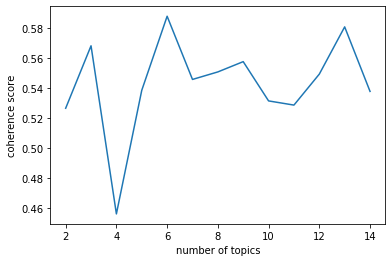

In [29]:
coh_visual(DMcorpus, DMdictionary, DMcleanlist_)

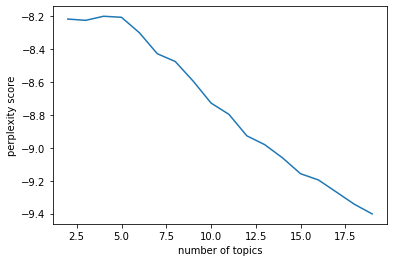

In [30]:
perp_visual(DMcorpus, DMdictionary)

=> num_topics = 6으로 결정

In [31]:
ldamodel = gensim.models.ldamodel.LdaModel(DMcorpus, num_topics=6, alpha=0.1, id2word = DMdictionary)
ldamodel.print_topics(num_words=20)

[(0,
  '0.010*"안" + 0.009*"제조" + 0.009*"있음" + 0.008*"등" + 0.008*"수" + 0.007*"제항" + 0.007*"경우" + 0.006*"신설" + 0.005*"규정" + 0.005*"현행법" + 0.005*"함" + 0.005*"제조제항" + 0.004*"제도" + 0.004*"필요" + 0.003*"국민" + 0.003*"법" + 0.003*"제호" + 0.003*"년" + 0.003*"국가" + 0.003*"사항"'),
 (1,
  '0.011*"안" + 0.011*"제조" + 0.010*"있음" + 0.009*"등" + 0.008*"수" + 0.007*"경우" + 0.006*"현행법" + 0.006*"신설" + 0.005*"제항" + 0.005*"함" + 0.005*"필요" + 0.005*"규정" + 0.005*"마련" + 0.004*"임" + 0.004*"년" + 0.004*"지원" + 0.004*"발생" + 0.004*"국가" + 0.004*"상황" + 0.004*"제조제항"'),
 (2,
  '0.060*"법률안" + 0.059*"일부" + 0.059*"개정" + 0.057*"일부개정법률안" + 0.015*"법률" + 0.010*"법" + 0.008*"등" + 0.005*"지방" + 0.005*"국가" + 0.005*"특례" + 0.005*"지원" + 0.004*"특별법" + 0.004*"제한" + 0.004*"산업" + 0.004*"발전" + 0.003*"안" + 0.003*"제조" + 0.003*"의안번호" + 0.003*"국민" + 0.003*"제호"'),
 (3,
  '0.008*"제조" + 0.008*"안" + 0.007*"있음" + 0.006*"수" + 0.004*"등" + 0.004*"경우" + 0.004*"현행법" + 0.004*"신설" + 0.004*"제항" + 0.003*"함" + 0.003*"임" + 0.003*"발생" + 0.003*"규정" + 0.003*"거래" + 0.003*"

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, DMcorpus, DMdictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.037044  0.033155       1        1  36.552086
0     -0.047078  0.012900       2        1  19.090961
5      0.003129  0.019517       3        1  13.904111
2      0.174748 -0.000849       4        1  12.206505
4     -0.056485  0.025470       5        1  11.959719
3     -0.037271 -0.090193       6        1   6.286613, topic_info=        Term         Freq        Total Category  logprob  loglift
3        법률안  2668.000000  2668.000000  Default  30.0000  30.0000
8    일부개정법률안  2481.000000  2481.000000  Default  29.0000  29.0000
0         개정  2726.000000  2726.000000  Default  28.0000  28.0000
7         일부  2800.000000  2800.000000  Default  27.0000  27.0000
247       법률  1281.000000  1281.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
247       법률    38.120010  1281.658447   Topic6  -6.1965  -0.7484
310       포함    33.406685   477.385284   Topic6  -6.3285   0.1072
850       설치    33.452782   489.257141   Topic6  -6.3272   0.0840
153        년    33.803516   885.860474   Topic6  -6.3167  -0.4992
151       국가    33.535336   953.455200   Topic6  -6.3247  -0.5807

[556 rows x 6 columns], token_table=       Topic      Freq Term
term                       
406        1  0.448833    ㆍ
406        2  0.135151    ㆍ
406        3  0.153504    ㆍ
406        4  0.056730    ㆍ
406        5  0.155173    ㆍ
...      ...       ...  ...
520        3  0.135757    후
520        4  0.069264    후
520        5  0.094199    후
520        6  0.083116    후
11472      5  0.862183  후순위

[1458 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 6, 3, 5, 4])

DM = ldamodel.show_topic(9)
DM_ = pd.DataFrame(DM)
DM_

# 5. 미래통합당 TopicModeling

In [28]:
MT_clean = Preproc(MT_text)
MTcorpus, MTdictionary, MTcleanlist_ = make_corpus(MT_clean)

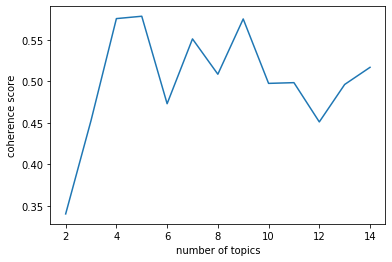

In [29]:
coh_visual(MTcorpus, MTdictionary, MTcleanlist_)

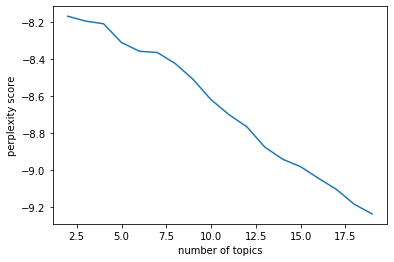

In [30]:
perp_visual(MTcorpus, MTdictionary)

=> num_topics = 5로 결정

In [31]:
ldamodel = gensim.models.ldamodel.LdaModel(MTcorpus, num_topics=5, alpha=0.1, id2word = MTdictionary)
ldamodel.print_topics(num_words=20)

[(0,
  '0.020*"일부" + 0.019*"개정" + 0.019*"법률안" + 0.019*"일부개정법률안" + 0.010*"안" + 0.009*"있음" + 0.007*"등" + 0.007*"제조" + 0.007*"수" + 0.007*"제항" + 0.005*"법" + 0.005*"현행법" + 0.005*"제조제항" + 0.004*"제한" + 0.004*"경우" + 0.004*"규정" + 0.004*"지방" + 0.004*"신설" + 0.003*"특례" + 0.003*"국가"'),
 (1,
  '0.009*"안" + 0.008*"있음" + 0.008*"제조" + 0.006*"등" + 0.006*"제항" + 0.006*"경우" + 0.006*"신설" + 0.005*"수" + 0.005*"함" + 0.005*"지역" + 0.004*"현행법" + 0.004*"년" + 0.004*"필요" + 0.004*"지원" + 0.004*"국가" + 0.003*"이" + 0.003*"임" + 0.003*"지방" + 0.003*"시" + 0.003*"발전"'),
 (2,
  '0.046*"일부" + 0.046*"법률안" + 0.046*"개정" + 0.045*"일부개정법률안" + 0.019*"법률" + 0.009*"법" + 0.009*"등" + 0.007*"지원" + 0.006*"제한" + 0.005*"조세" + 0.005*"특례" + 0.005*"조세특례제한법" + 0.004*"관리" + 0.004*"안" + 0.004*"제조" + 0.004*"수" + 0.003*"경우" + 0.003*"특별법" + 0.003*"있음" + 0.003*"세법"'),
 (3,
  '0.009*"제조" + 0.009*"안" + 0.008*"등" + 0.007*"있음" + 0.006*"수" + 0.006*"경우" + 0.006*"신설" + 0.005*"함" + 0.005*"현행법" + 0.004*"임" + 0.004*"상황" + 0.004*"규정" + 0.004*"제항" + 0.004*"지원" + 0

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, MTcorpus, MTdictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.043810  0.021767       1        1  44.505676
3     -0.048310 -0.022280       2        1  18.742956
1     -0.047975 -0.020435       3        1  17.105740
2      0.104964 -0.026337       4        1   9.981188
0      0.035132  0.047286       5        1   9.664435, topic_info=        Term         Freq        Total Category  logprob  loglift
5         일부  1129.000000  1129.000000  Default  30.0000  30.0000
3        법률안  1057.000000  1057.000000  Default  29.0000  29.0000
0         개정  1066.000000  1066.000000  Default  28.0000  28.0000
6    일부개정법률안   995.000000   995.000000  Default  27.0000  27.0000
135       법률   490.000000   490.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
253       사용    26.559748   152.579193   Topic5  -6.1535   0.5884
131        함    31.303089   501.006897   Topic5  -5.9892  -0.4362
104       단체    28.618702   309.228027   Topic5  -6.0788  -0.0433
196       지원    30.413023   591.361023   Topic5  -6.0180  -0.6308
71         임    29.546078   504.970673   Topic5  -6.0470  -0.5018

[430 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
10198      3  0.968541  가격안정
5377       1  0.972042    가업
9536       1  0.916475    가축
601        1  0.362464     간
601        2  0.225167     간
...      ...       ...   ...
757        1  0.363361   활성화
757        2  0.139754   활성화
757        3  0.342398   활성화
757        4  0.090840   활성화
757        5  0.069877   활성화

[911 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

MT = ldamodel.show_topic(9)
MT_ = pd.DataFrame(MT)
MT_

# 6. 무소속 TopicModeling

In [28]:
MS_clean = Preproc(MS_text)
MScorpus, MSdictionary, MScleanlist_ = make_corpus(MS_clean)

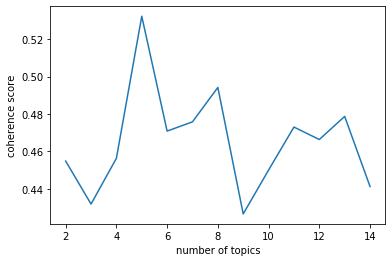

In [29]:
coh_visual(MScorpus, MSdictionary, MScleanlist_)

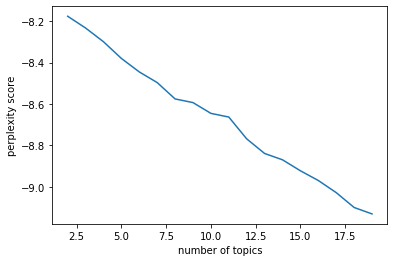

In [30]:
perp_visual(MScorpus, MSdictionary)

=> number of topics = 5로 결정

In [31]:
ldamodel = gensim.models.ldamodel.LdaModel(MScorpus, num_topics=5, alpha=0.1, id2word = MSdictionary)
ldamodel.print_topics(num_words=20)

[(0,
  '0.009*"일부" + 0.009*"개정" + 0.009*"등" + 0.008*"법률안" + 0.008*"일부개정법률안" + 0.007*"제조" + 0.007*"안" + 0.007*"있음" + 0.007*"법률" + 0.005*"제항" + 0.005*"규정" + 0.005*"수" + 0.005*"경우" + 0.004*"신설" + 0.004*"년" + 0.003*"현행법" + 0.003*"지원" + 0.003*"제조제항" + 0.003*"관리" + 0.003*"함"'),
 (1,
  '0.023*"법률안" + 0.023*"일부" + 0.023*"개정" + 0.022*"일부개정법률안" + 0.010*"등" + 0.008*"제조" + 0.007*"있음" + 0.006*"안" + 0.006*"법률" + 0.005*"수" + 0.005*"지원" + 0.004*"제항" + 0.004*"국가" + 0.004*"신설" + 0.004*"현행법" + 0.004*"제조제항" + 0.004*"규정" + 0.003*"지방" + 0.003*"경우" + 0.003*"이"'),
 (2,
  '0.008*"등" + 0.007*"제조" + 0.006*"안" + 0.006*"개정" + 0.006*"있음" + 0.006*"일부" + 0.005*"법률안" + 0.005*"경우" + 0.005*"수" + 0.005*"현행법" + 0.004*"일부개정법률안" + 0.004*"제항" + 0.004*"규정" + 0.004*"신설" + 0.004*"임" + 0.004*"발생" + 0.004*"관련" + 0.004*"국가" + 0.004*"함" + 0.004*"필요"'),
 (3,
  '0.012*"안" + 0.010*"제조" + 0.010*"있음" + 0.009*"등" + 0.007*"수" + 0.006*"현행법" + 0.006*"경우" + 0.006*"제항" + 0.005*"필요" + 0.005*"신설" + 0.004*"제조제항" + 0.004*"함" + 0.004*"규정" + 0.003*

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, MScorpus, MSdictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.016315 -0.005084       1        1  34.552853
4     -0.016366 -0.003736       2        1  18.049288
1      0.041838 -0.007912       3        1  17.002886
2     -0.010984 -0.012207       4        1  16.892595
0      0.001827  0.028939       5        1  13.502378, topic_info=        Term        Freq       Total Category  logprob  loglift
6    일부개정법률안  754.000000  754.000000  Default  30.0000  30.0000
3        법률안  818.000000  818.000000  Default  29.0000  29.0000
0         개정  829.000000  829.000000  Default  28.0000  28.0000
5         일부  848.000000  848.000000  Default  27.0000  27.0000
135       법률  378.000000  378.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
131        함   38.686245  375.097870   Topic5  -5.8718  -0.2694
170       사항   32.024857  241.116058   Topic5  -6.0608  -0.0165
98         법   34.304096  296.794891   Topic5  -5.9920  -0.1555
93        필요   36.914318  411.498474   Topic5  -5.9187  -0.4089
132       해당   31.628805  266.727203   Topic5  -6.0732  -0.1299

[426 rows x 6 columns], token_table=      Topic      Freq Term
term                      
217       1  0.452750    간
217       2  0.146048    간
217       3  0.160653    간
217       4  0.131444    간
217       5  0.102234    간
...     ...       ...  ...
334       1  0.499227    후
334       2  0.150710    후
334       3  0.131871    후
334       4  0.131871    후
334       5  0.084774    후

[810 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

MS = ldamodel.show_topic(9)
MS_ = pd.DataFrame(MS)
MS_

# 7. 정의당 TopicModeling

In [28]:
JE_clean = Preproc(JE_text)
JEcorpus, JEdictionary, JEcleanlist_ = make_corpus(JE_clean)

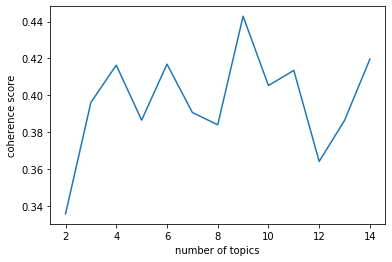

In [29]:
coh_visual(JEcorpus, JEdictionary, JEcleanlist_)

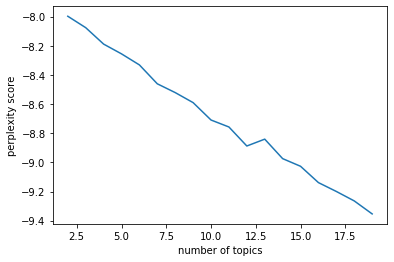

In [30]:
perp_visual(JEcorpus, JEdictionary)

=> number of topics = 9로 결정

In [31]:
ldamodel = gensim.models.ldamodel.LdaModel(JEcorpus, num_topics=9, alpha=0.1, id2word = JEdictionary)
ldamodel.print_topics(num_words=20)

[(0,
  '0.008*"제조" + 0.007*"등" + 0.006*"있음" + 0.006*"안" + 0.005*"경우" + 0.005*"신설" + 0.004*"규정" + 0.004*"함" + 0.004*"현행법" + 0.004*"수" + 0.003*"제항" + 0.003*"필요" + 0.003*"ㆍ" + 0.003*"지원" + 0.003*"해당" + 0.003*"지방" + 0.003*"국가" + 0.003*"문제" + 0.003*"법" + 0.003*"사회"'),
 (1,
  '0.013*"일부" + 0.013*"개정" + 0.013*"법률안" + 0.012*"일부개정법률안" + 0.009*"등" + 0.007*"있음" + 0.007*"안" + 0.006*"제조" + 0.006*"법률" + 0.005*"수" + 0.004*"지원" + 0.004*"제호" + 0.004*"제항" + 0.004*"경우" + 0.004*"규정" + 0.004*"현행법" + 0.003*"국가" + 0.003*"필요" + 0.003*"함" + 0.003*"이"'),
 (2,
  '0.007*"제조" + 0.007*"일부" + 0.007*"등" + 0.007*"개정" + 0.007*"있음" + 0.006*"법률안" + 0.006*"안" + 0.006*"일부개정법률안" + 0.006*"수" + 0.005*"신설" + 0.005*"경우" + 0.004*"규정" + 0.004*"법" + 0.003*"제항" + 0.003*"년" + 0.003*"필요" + 0.003*"지원" + 0.003*"부담" + 0.003*"비용" + 0.003*"국가"'),
 (3,
  '0.009*"안" + 0.009*"등" + 0.008*"제조" + 0.007*"있음" + 0.006*"경우" + 0.006*"현행법" + 0.005*"신설" + 0.005*"규정" + 0.005*"수" + 0.004*"발생" + 0.004*"제항" + 0.004*"이" + 0.004*"일부" + 0.004*"필요" + 0.004*"임

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, JEcorpus, JEdictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.060997  0.011363       1        1  17.618639
1      0.000690  0.019847       2        1  17.208103
3     -0.010403 -0.019802       3        1  15.861943
5      0.004945  0.058111       4        1  15.766534
7      0.013213 -0.007261       5        1  11.759816
4     -0.010055 -0.012567       6        1   7.378561
2     -0.010596 -0.040851       7        1   6.407522
0      0.042846 -0.000704       8        1   6.003504
6      0.030356 -0.008137       9        1   1.995378, topic_info=        Term        Freq       Total Category  logprob  loglift
6    일부개정법률안  219.000000  219.000000  Default  30.0000  30.0000
0         개정  241.000000  241.000000  Default  29.0000  29.0000
5         일부  248.000000  248.000000  Default  28.0000  28.0000
3        법률안  236.000000  236.000000  Default  27.0000  27.0000
80        제조  221.000000  221.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
93        필요    1.342800   95.710495   Topic9  -6.0793  -0.3522
16        경우    1.529085  159.328384   Topic9  -5.9494  -0.7320
120        자    1.130339   55.081276   Topic9  -6.2516   0.0280
214        ㆍ    1.157897   65.899651   Topic9  -6.2275  -0.1272
22        국가    1.122623   92.476494   Topic9  -6.2584  -0.4969

[734 rows x 6 columns], token_table=      Topic      Freq Term
term                      
214       1  0.106222    ㆍ
214       2  0.197270    ㆍ
214       3  0.166920    ㆍ
214       4  0.182095    ㆍ
214       5  0.151746    ㆍ
...     ...       ...  ...
4572      3  0.380205   후관
2501      2  0.140329   휴가
2501      3  0.140329   휴가
2501      4  0.140329   휴가
2501      5  0.561318   휴가

[1583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 4, 6, 8, 5, 3, 1, 7])

JE = ldamodel.show_topic(9)
JE_ = pd.DataFrame(JE)
JE_

# 8. 열린민주당 TopicModeling

In [28]:
YM_clean = Preproc(YM_text)
YMcorpus, YMdictionary, YMcleanlist_ = make_corpus(YM_clean)

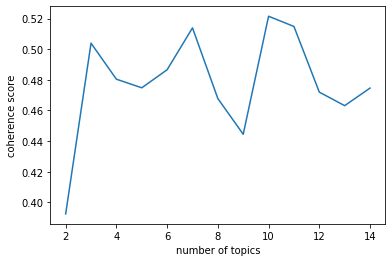

In [29]:
coh_visual(YMcorpus, YMdictionary, YMcleanlist_)

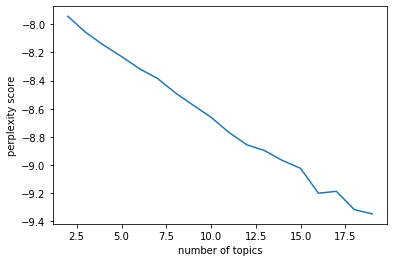

In [30]:
perp_visual(YMcorpus, YMdictionary)

=> number of topics = 7로 결정

In [31]:
ldamodel = gensim.models.ldamodel.LdaModel(YMcorpus, num_topics=7, alpha=0.1, id2word = YMdictionary)
ldamodel.print_topics(num_words=20)

[(0,
  '0.010*"안" + 0.010*"등" + 0.009*"제조" + 0.008*"있음" + 0.006*"규정" + 0.006*"경우" + 0.005*"제항" + 0.005*"필요" + 0.005*"현행법" + 0.005*"수" + 0.004*"신설" + 0.004*"함" + 0.004*"개정" + 0.004*"제조제항" + 0.004*"법률" + 0.003*"년" + 0.003*"임" + 0.003*"보호" + 0.003*"일부" + 0.003*"중"'),
 (1,
  '0.012*"등" + 0.008*"수" + 0.007*"제조" + 0.007*"안" + 0.007*"있음" + 0.006*"일부" + 0.006*"개정" + 0.006*"법률안" + 0.006*"일부개정법률안" + 0.005*"법률" + 0.005*"함" + 0.005*"신설" + 0.005*"경우" + 0.005*"규정" + 0.004*"필요" + 0.004*"현행법" + 0.004*"제항" + 0.003*"보호" + 0.003*"해당" + 0.003*"상황"'),
 (2,
  '0.007*"일부" + 0.006*"안" + 0.006*"개정" + 0.006*"법률안" + 0.006*"제조" + 0.006*"일부개정법률안" + 0.006*"수" + 0.005*"등" + 0.005*"있음" + 0.004*"필요" + 0.004*"현행법" + 0.004*"지원" + 0.003*"경우" + 0.003*"제항" + 0.003*"국가" + 0.003*"년" + 0.003*"마련" + 0.003*"법" + 0.003*"함" + 0.003*"주택"'),
 (3,
  '0.013*"개정" + 0.013*"법률안" + 0.013*"일부" + 0.012*"일부개정법률안" + 0.009*"등" + 0.008*"안" + 0.008*"있음" + 0.008*"제조" + 0.006*"현행법" + 0.006*"제항" + 0.006*"수" + 0.005*"신설" + 0.005*"경우" + 0.005*"규정" +

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, YMcorpus, YMdictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.018790  0.014715       1        1  25.101862
3     -0.037384 -0.050700       2        1  20.189835
1     -0.003262  0.014724       3        1  12.903746
4     -0.000173  0.008257       4        1  11.272299
2      0.005706  0.004769       5        1  11.198656
5     -0.005757  0.031916       6        1   9.803371
6      0.059661 -0.023681       7        1   9.530230, topic_info=        Term        Freq       Total Category  logprob  loglift
3        법률안  196.000000  196.000000  Default  30.0000  30.0000
5         일부  197.000000  197.000000  Default  29.0000  29.0000
6    일부개정법률안  184.000000  184.000000  Default  28.0000  28.0000
0         개정  201.000000  201.000000  Default  27.0000  27.0000
135       법률   97.000000   97.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
82        제항    7.273130  113.500755   Topic7  -5.7922  -0.3969
41        발생    5.785859   63.980698   Topic7  -6.0210  -0.0525
24        규정    6.458001  111.500328   Topic7  -5.9110  -0.4980
264      현행법    6.401478  113.395584   Topic7  -5.9198  -0.5237
93        필요    5.789372   96.982155   Topic7  -6.0203  -0.4678

[570 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
307       1  0.244235      ㆍ
307       2  0.263022      ㆍ
307       3  0.112724      ㆍ
307       4  0.131511      ㆍ
307       5  0.075149      ㆍ
...     ...       ...    ...
204       6  0.085541     확보
204       7  0.085541     확보
2924      4  0.618986   확정일자
1542      2  0.862365  환경부장관
2123      6  0.450615     활력

[1185 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3, 6, 7])

YM = ldamodel.show_topic(9)
YM_ = pd.DataFrame(YM)
YM_

# 9. 국민의당 TopicModeling

In [28]:
KM_clean = Preproc(KM_text)
KMcorpus, KMdictionary, KMcleanlist_ = make_corpus(KM_clean)

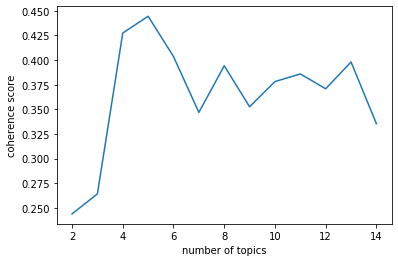

In [29]:
coh_visual(KMcorpus, KMdictionary, KMcleanlist_)

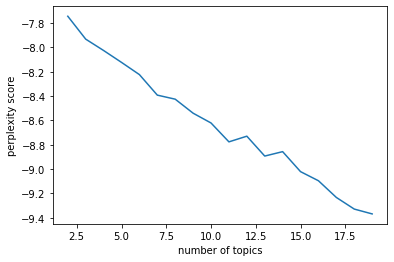

In [30]:
perp_visual(KMcorpus, KMdictionary)

=> number of topics = 5로 결정

In [31]:
ldamodel = gensim.models.ldamodel.LdaModel(KMcorpus, num_topics=5, alpha=0.1, id2word = KMdictionary)
ldamodel.print_topics(num_words=20)

[(0,
  '0.009*"등" + 0.008*"안" + 0.008*"제조" + 0.007*"있음" + 0.006*"법률" + 0.006*"경우" + 0.006*"수" + 0.005*"제항" + 0.005*"현행법" + 0.005*"개정" + 0.005*"법률안" + 0.004*"일부" + 0.004*"제호" + 0.004*"규정" + 0.004*"신설" + 0.004*"관리" + 0.004*"일부개정법률안" + 0.004*"제조제항" + 0.003*"보호" + 0.003*"함"'),
 (1,
  '0.010*"안" + 0.009*"제조" + 0.007*"있음" + 0.006*"수" + 0.006*"현행법" + 0.006*"제항" + 0.006*"등" + 0.006*"경우" + 0.006*"신설" + 0.005*"필요" + 0.004*"함" + 0.004*"제조제항" + 0.003*"관련" + 0.003*"규정" + 0.003*"제호" + 0.003*"년" + 0.003*"지적" + 0.003*"국가" + 0.003*"개정" + 0.003*"설치"'),
 (2,
  '0.011*"등" + 0.009*"제조" + 0.009*"있음" + 0.008*"개정" + 0.008*"일부" + 0.008*"안" + 0.007*"법률안" + 0.007*"일부개정법률안" + 0.006*"현행법" + 0.006*"제항" + 0.005*"법률" + 0.005*"경우" + 0.004*"규정" + 0.004*"제조제항" + 0.004*"수" + 0.004*"이" + 0.004*"신설" + 0.004*"자" + 0.003*"지원" + 0.003*"해당"'),
 (3,
  '0.026*"개정" + 0.025*"일부" + 0.025*"일부개정법률안" + 0.025*"법률안" + 0.008*"등" + 0.007*"안" + 0.007*"법" + 0.006*"있음" + 0.006*"법률" + 0.006*"제조" + 0.005*"수" + 0.004*"제항" + 0.004*"현행법" + 0.004*

In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, KMcorpus, KMdictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.004641  0.040595       1        1  23.633190
0     -0.004034 -0.012173       2        1  22.443884
3      0.059471 -0.008075       3        1  20.186193
4     -0.016082 -0.004659       4        1  19.848301
1     -0.034713 -0.015688       5        1  13.888439, topic_info=        Term        Freq       Total Category  logprob  loglift
6    일부개정법률안   95.000000   95.000000  Default  30.0000  30.0000
5         일부  102.000000  102.000000  Default  29.0000  29.0000
0         개정  105.000000  105.000000  Default  28.0000  28.0000
1        법률안  103.000000  103.000000  Default  27.0000  27.0000
293        법   30.000000   30.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
313        바    3.840152   23.205969   Topic5  -6.0603   0.1752
526       기관    3.842623   25.242743   Topic5  -6.0596   0.0917
0         개정    4.542789  105.464371   Topic5  -5.8923  -1.1707
1        법률안    4.092722  103.338867   Topic5  -5.9966  -1.2547
20        발생    3.891084   32.192276   Topic5  -6.0471  -0.1389

[402 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
7         1  0.287753     ㆍ
7         2  0.287753     ㆍ
7         3  0.123323     ㆍ
7         4  0.164431     ㆍ
7         5  0.123323     ㆍ
...     ...       ...   ...
622       1  0.246154    확정
622       2  0.246154    확정
622       3  0.246154    확정
622       4  0.492308    확정
2338      2  0.633277  환경분야

[719 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 5, 2])